In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


# EDA and Preprocessing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [34]:
df.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [35]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


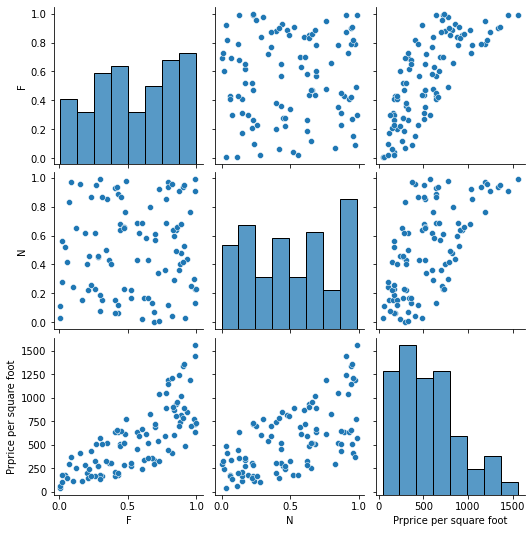

In [33]:
sns.pairplot(df)

<AxesSubplot:xlabel='F', ylabel='Prprice per square foot'>

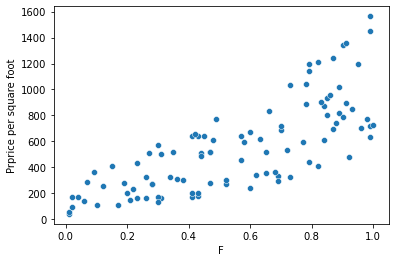

In [4]:
sns.scatterplot(x='F',y='Prprice per square foot',data=df)

<AxesSubplot:xlabel='N', ylabel='Prprice per square foot'>

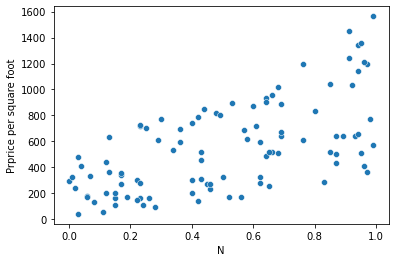

In [5]:
sns.scatterplot(x='N',y='Prprice per square foot',data=df)

From the plot above we saw that the datapoints are plotted in a curve that is why we will do polynomial regression.

# Splitting the dataset

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [7]:
x

array([[0.44, 0.68],
       [0.99, 0.23],
       [0.84, 0.29],
       [0.28, 0.45],
       [0.07, 0.83],
       [0.66, 0.8 ],
       [0.73, 0.92],
       [0.57, 0.43],
       [0.43, 0.89],
       [0.27, 0.95],
       [0.43, 0.06],
       [0.87, 0.91],
       [0.78, 0.69],
       [0.9 , 0.94],
       [0.41, 0.06],
       [0.52, 0.17],
       [0.47, 0.66],
       [0.65, 0.43],
       [0.85, 0.64],
       [0.93, 0.44],
       [0.41, 0.93],
       [0.36, 0.43],
       [0.78, 0.85],
       [0.69, 0.07],
       [0.04, 0.52],
       [0.17, 0.15],
       [0.68, 0.13],
       [0.84, 0.6 ],
       [0.38, 0.4 ],
       [0.12, 0.65],
       [0.62, 0.17],
       [0.79, 0.97],
       [0.82, 0.04],
       [0.91, 0.53],
       [0.35, 0.85],
       [0.57, 0.69],
       [0.52, 0.22],
       [0.31, 0.15],
       [0.6 , 0.02],
       [0.99, 0.91],
       [0.48, 0.76],
       [0.3 , 0.19],
       [0.58, 0.62],
       [0.65, 0.17],
       [0.6 , 0.69],
       [0.95, 0.76],
       [0.47, 0.23],
       [0.15,

In [8]:
y

array([[ 511.14],
       [ 717.1 ],
       [ 607.91],
       [ 270.4 ],
       [ 289.88],
       [ 830.85],
       [1038.09],
       [ 455.19],
       [ 640.17],
       [ 511.06],
       [ 177.03],
       [1242.52],
       [ 891.37],
       [1339.72],
       [ 169.88],
       [ 276.05],
       [ 517.43],
       [ 522.25],
       [ 932.21],
       [ 851.25],
       [ 640.11],
       [ 308.68],
       [1046.05],
       [ 332.4 ],
       [ 171.85],
       [ 109.55],
       [ 361.97],
       [ 872.21],
       [ 303.7 ],
       [ 256.38],
       [ 341.2 ],
       [1194.63],
       [ 408.6 ],
       [ 895.54],
       [ 518.25],
       [ 638.75],
       [ 301.9 ],
       [ 163.38],
       [ 240.77],
       [1449.05],
       [ 609.  ],
       [ 174.59],
       [ 593.45],
       [ 355.96],
       [ 671.46],
       [1193.7 ],
       [ 278.88],
       [ 411.4 ],
       [  42.08],
       [ 166.19],
       [  58.62],
       [ 642.45],
       [ 368.14],
       [ 702.78],
       [ 615.74],
       [ 1

# Splitting into Train and Test

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
x_train

array([[0.83, 0.64],
       [0.9 , 0.42],
       [0.42, 0.94],
       [0.23, 0.26],
       [0.45, 0.87],
       [0.84, 0.6 ],
       [0.85, 0.64],
       [0.1 , 0.24],
       [0.43, 0.12],
       [0.72, 0.34],
       [0.99, 0.23],
       [0.44, 0.64],
       [0.58, 0.62],
       [0.3 , 0.19],
       [0.07, 0.83],
       [0.52, 0.17],
       [0.65, 0.43],
       [0.48, 0.76],
       [0.6 , 0.02],
       [0.66, 0.8 ],
       [0.49, 0.98],
       [0.91, 0.95],
       [0.44, 0.68],
       [0.35, 0.85],
       [0.38, 0.4 ],
       [0.01, 0.11],
       [0.87, 0.91],
       [0.57, 0.69],
       [0.69, 0.07],
       [0.09, 0.97],
       [0.43, 0.06],
       [0.79, 0.97],
       [0.31, 0.87],
       [0.26, 0.62],
       [0.82, 0.96],
       [0.98, 0.3 ],
       [0.82, 0.04],
       [0.69, 0.  ],
       [0.41, 0.06],
       [1.  , 0.23],
       [0.93, 0.44],
       [0.12, 0.65],
       [0.26, 0.23],
       [0.87, 0.36],
       [0.23, 0.87],
       [0.79, 0.12],
       [0.41, 0.93],
       [0.34,

In [11]:
y_train

array([[ 905.83],
       [ 784.74],
       [ 661.12],
       [ 165.21],
       [ 642.45],
       [ 872.21],
       [ 932.21],
       [ 109.  ],
       [ 202.01],
       [ 534.24],
       [ 717.1 ],
       [ 487.33],
       [ 593.45],
       [ 174.59],
       [ 289.88],
       [ 276.05],
       [ 522.25],
       [ 609.  ],
       [ 240.77],
       [ 830.85],
       [ 771.11],
       [1360.49],
       [ 511.14],
       [ 518.25],
       [ 303.7 ],
       [  58.62],
       [1242.52],
       [ 638.75],
       [ 332.4 ],
       [ 368.14],
       [ 177.03],
       [1194.63],
       [ 503.04],
       [ 328.28],
       [1211.31],
       [ 775.68],
       [ 408.6 ],
       [ 292.23],
       [ 169.88],
       [ 726.9 ],
       [ 851.25],
       [ 256.38],
       [ 166.19],
       [ 696.65],
       [ 434.53],
       [ 438.4 ],
       [ 640.11],
       [ 325.89],
       [ 174.44],
       [ 518.29],
       [ 109.55],
       [ 163.38],
       [ 283.7 ],
       [ 278.88],
       [1449.05],
       [ 7

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# Polynomial Regression of degree 2

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y_train)

LinearRegression()

In [14]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
y_pred

array([[ 357.17362017],
       [ 134.62134083],
       [ 612.51419335],
       [ 144.24521615],
       [ 573.42050286],
       [ 228.16895798],
       [ 521.14150108],
       [ 483.95666764],
       [ 623.8493532 ],
       [ 633.60623163],
       [ 706.75933684],
       [1030.57919001],
       [1155.32251691],
       [1326.45920604],
       [ 459.54869951],
       [ 337.81684363],
       [1048.22575817],
       [ 161.886029  ],
       [ 907.89161529],
       [ 642.42721708],
       [ 359.53213642],
       [ 196.12388051],
       [ 258.21132424],
       [ 835.00725517],
       [1202.72891739],
       [  82.96763707],
       [1047.11232779],
       [ 597.18430664],
       [ 691.571971  ],
       [ 969.46051522]])

# Polynomial Regression of degree 3

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
lin_reg_3=LinearRegression()
lin_reg_3.fit(x_poly,y_train)

LinearRegression()

In [17]:
y_pred2=lin_reg_3.predict(poly_reg.fit_transform(x_test))
y_pred2

array([[ 359.69822599],
       [ 131.69469235],
       [ 610.03937113],
       [ 149.21030432],
       [ 565.89710297],
       [ 237.34726884],
       [ 521.00202284],
       [ 484.11497884],
       [ 620.90943623],
       [ 631.82726913],
       [ 703.83356342],
       [1027.65800721],
       [1151.52997806],
       [1331.96311525],
       [ 461.32548945],
       [ 341.12705786],
       [1042.77436008],
       [ 170.2804545 ],
       [ 904.09899596],
       [ 635.6113259 ],
       [ 362.32147286],
       [ 204.13439557],
       [ 266.89829492],
       [ 830.80900695],
       [1205.35430134],
       [  41.0148524 ],
       [1040.01002485],
       [ 594.93031387],
       [ 687.37271799],
       [ 965.27904618]])

# Performance metrics

In [23]:
from sklearn import metrics
import statsmodels.api as sm

In [31]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred2))


118.34109058118055
31.117883358598338


y_pred3 has minimum error that is 31.11.

In [30]:
print(metrics.r2_score(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred2))


0.9990105117892579
0.9997398132924468


y_pred3 has maximum accuracy that is 99.97%.

In [32]:
X1_stat=sm.add_constant(x_train)
Summ=sm.OLS(y_train,X1_stat).fit()
Summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     510.5
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           2.79e-41
Time:                        18:26:07   Log-Likelihood:                -410.40
No. Observations:                  70   AIC:                             826.8
Df Residuals:                      67   BIC:                             833.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.3976     27.328    -10.078      0.000    -329.944    -220.852
x1           900.2997     36.490     24.672      0.000     827.465     973.135
x2           662.4219     33.285     19.902      0.000     595.985     728.859
==============================================================================
Omnibus:                       26.825   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.135
Skew:                           1.574   Prob(JB):                     1.93e-09
Kurtosis:                       4.964   Cond. No.                         5.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

As we can see from the polynomial regression's performance metric values the equation with degree 3 has minimum MSE and the accuracy is more with degree 3.

So we can choose the model with degree 3 which has less error and maximum error.